# <b>Lab 3</b>: Clustering Analysis using KMEANS, DBSCAN. and GMM


# <font color='blue'>Student Exam Scores Extended Dataset</font>   
**Kaggle Dataset:** https://www.kaggle.com/datasets/desalegngeb/students-exam-scores

<img src="MSDS.png" alt="Logo Picture"><img src="students.jpg" alt="Logo Picture" width = 300 height = 300>

### <b> Team Members: </b> Joey Hernandez, Daniel Chang, and Vo Nguyen

### <b> Contributions: </b>
- Cluster Analysis: **Vo Nguyen**
- []: **Joey Hernandez**
- []: **Danny Chang**

### <b>Table of Contents</b>
<a class="anchor" id="toc"></a>
* **[Business Understanding](#understand)**
* **[Data Understanding](#data)**
* **[Data Preprocessing](#data)**
    * [Import Packages](#import)
    * [Loading the Data](#load)
    * [Numeric Dataframe for Clustering](#cluster)
* **[Model and Evaluation: Cluster Analysis](#ca)**
    * [KMeans](#kmeans)
    * [DBSCAN](#dbscan)
    * [Gaussian Mixture Models](#gmm)
* **[Exceptional Work](#ew)**
* **[Conclusion](#conclusion)**

## <font color='blue'>Business Understanding <font> [↑](#toc)
<a class="anchor" id="understand"></a>

The dataset (fictional) comprises scores from three tests of students at a public school, as well as personal and socio-economic factors that may have interaction effects. The purpose of collecting this data is to identify potential relationships between personal and socio-economic factors and test scores. By understanding which factors have the most significant impact on test scores, educators, parents, and students can focus their attention on variables that could potentially help students earn higher scores. This information can be used to inform educational policies and practices, as well as to develop targeted interventions to support students who may be struggling academically. Ultimately, the goal of collecting this data is to improve educational outcomes and promote academic success for all students.

Student education and testing scores are critical to their future success. Education provides the foundation upon which students will build their future, and improving the efficiency of learning and testing experiences can have a positive impact on many students' futures. By analyzing the dataset, we can identify factors that influence student performance and develop strategies to improve academic outcomes.

Our metric of success in the data mining process can be assessed with whether or not we are able to uncover patterns and/or significant relationships that help us to better understand student performance factors. This could include identifying significant predictors of test scores, understanding the impact of certain attributes on student scores, etc. By evaluating the results of our analyses in light of the original research questions, we can determine whether we have gained useful insights from our data mining process which can inform educational policies and practices and promote academic success for all students.

To measure the effectiveness of a good prediction algorithm, we need to evaluate its accuracy in predicting test scores and its interpretability in identifying the factors that influence those scores. Accuracy can be measured using standard metrics such as mean squared error or root mean squared error, which compare the predicted test scores to the actual scores. However, accuracy alone is not sufficient to evaluate the effectiveness of a prediction algorithm. We also need to consider the interpretability of the results, which requires us to examine the relationship between the input variables and the predicted test scores.

## <font color='blue'> Data Understanding <font> [↑](#toc)
<a class="anchor" id="data"></a>

###  Missing Values At A Glance
  
  - The data set contained many missing values at first glance. Upon further investigation, we found that many columns of data contain "nan".<br><br>    
   - The nan values are only in categorical variables and could likely be attributed to not having an answer that fits within the given responses. It's hard to determine this since we have no information on how each response was gathered, and from who/how it was gathered.<br><br>      
   - The missing data will of course be handled on a case by case basis, but we will evaluate the missing values to uncover potential reasons that will aid us in understanding how to handle the NANs.<br><br>
   - In total NAN makes up 37.2% of the data in our dataframe.

### Handling Missing Values 
   
   After investigation of our data and under the assumption that our data are missing completely at random, there are a number of ways for us to proceed:
   1) Discard observations with any missing values
   2) Relying on a learning algorithm to deal with missing values in the training phase
   3) Impute all missing values before training. 

**The 2 options discussed for our group:**


Option 1 would effectively remove 37.2% of the observations in our data frame. This is quite a substantial loss of information and was ultimately decided against. 

Option 3 (imputation). This option seems to make sense given that the data appear to be MCAR, it will allow us to keep the 37% of our data effectively preserving our sample size, and it will help us to maintain more statistical power and precision. It should however be noted that while data imputation is very useful in handling missing values some tradeoffs and consideration are to be had such as: 
 - Potential Bias
 - Assumption reliance
 - Loss of Variability
 - Uncertainty estimation

### Histogram of Scores

To see the overall distribution and outliers of our data we created histograms for the test score variables. Additionally, so that we can make efficient use of our plots, we have overlaid the median score on the histograms so that we can see where that lies within the distribution for each of the test scores.

We chose the median because we found that the data is skewed; therefore, the median is the more appropriate way method.

Our team will be performing exploratory data analysis with an emphasis on visualization and data processing using the dataset found on [Kaggle](https://www.kaggle.com/datasets/desalegngeb/students-exam-scores). The EDA will consist of statistical summaries of attributes, visualizing attributes, and providing interpretations and conclusions based on the visualization and data processing.

## <font color='blue'> Data Preprocessing <font>

### Import Packages [↑](#toc)
<a class="anchor" id="import"></a>

In [44]:
# getting things started
%matplotlib inline

import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV

### Loading the Data [↑](#toc)
<a class="anchor" id="load"></a>

In [16]:
df = pd.read_csv('cleandf.csv')
display(df)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,MathResult,ReadingResult,WritingResult
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,Pass,Pass,Pass
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,Fail,Pass,Pass
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42,Fail,Fail,Fail
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,Pass,Pass,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,Fail,Fail,Fail
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,Fail,Fail,Fail
30638,female,group C,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67,Fail,Pass,Fail
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,Pass,Pass,Pass


### Numeric Dataframe for Clustering [↑](#toc)
<a class="anchor" id="num"></a>

In [17]:
num_df = df[["MathScore","ReadingScore","WritingScore"]]

In [18]:
num_df.head()


,MathScore,ReadingScore,WritingScore
0,71,71,74
1,69,90,88
2,87,93,91
3,45,56,42
4,76,78,75


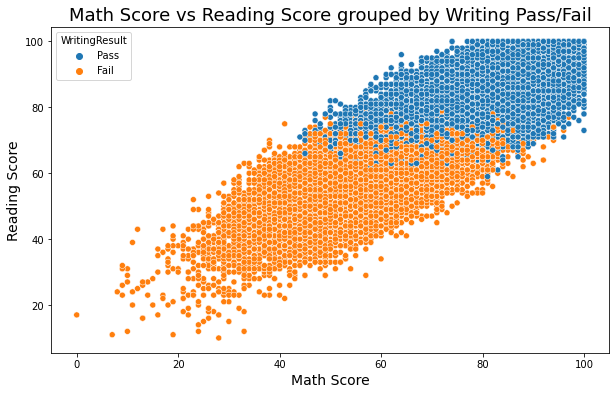

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming math_read_df is your DataFrame and it has columns "MathScore" and "ReadingScore"

plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.scatterplot(x='MathScore', y='ReadingScore',hue="WritingResult", data=df)

plt.title('Math Score vs Reading Score grouped by Writing Pass/Fail', fontsize=18)  # Add a title
plt.xlabel('Math Score', fontsize=14)  # Label the x-axis
plt.ylabel('Reading Score', fontsize=14)  # Label the y-axis

plt.show()


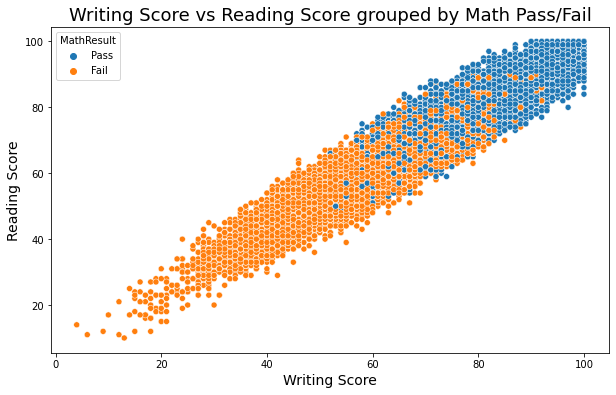

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.scatterplot(x='WritingScore', y='ReadingScore',hue="MathResult", data=df)

plt.title('Writing Score vs Reading Score grouped by Math Pass/Fail', fontsize=18)  # Add a title
plt.xlabel('Writing Score', fontsize=14)  # Label the x-axis
plt.ylabel('Reading Score', fontsize=14)  # Label the y-axis

plt.show()

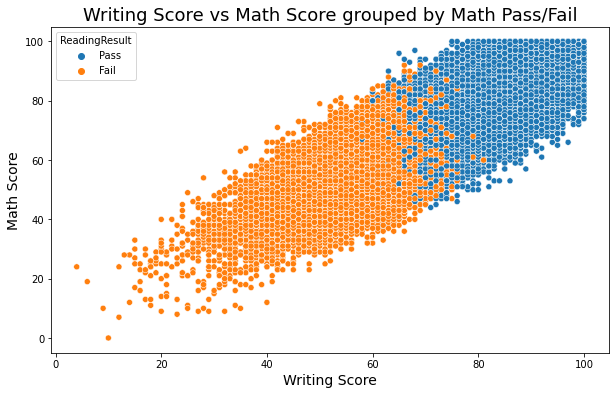

In [21]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.scatterplot(x='WritingScore', y='MathScore',hue="ReadingResult", data=df)

plt.title('Writing Score vs Math Score grouped by Math Pass/Fail', fontsize=18)  # Add a title
plt.xlabel('Writing Score', fontsize=14)  # Label the x-axis
plt.ylabel('Math Score', fontsize=14)  # Label the y-axis

plt.show()

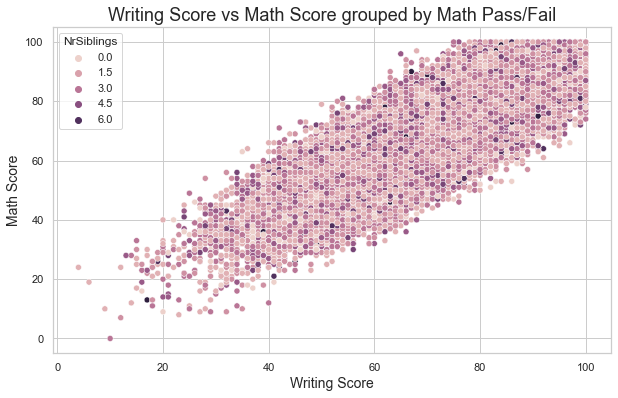

In [113]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.scatterplot(x='WritingScore', y='MathScore',hue="NrSiblings", data=df)

plt.title('Writing Score vs Math Score grouped by Math Pass/Fail', fontsize=18)  # Add a title
plt.xlabel('Writing Score', fontsize=14)  # Label the x-axis
plt.ylabel('Math Score', fontsize=14)  # Label the y-axis

plt.show()

In [22]:
unlabeled_df = num_df.rename(columns={'MathScore': 'Num1', 'ReadingScore': 'Num2', 'WritingScore': 'Num3'})


In [23]:
unlabeled_df.head()

,Num1,Num2,Num3
0,71,71,74
1,69,90,88
2,87,93,91
3,45,56,42
4,76,78,75


In [24]:
unlabeled_df.count()

Num1    30641
Num2    30641
Num3    30641
dtype: int64

### Math vs Reading Dataframe

In [25]:
math_read_df = unlabeled_df[["Num1","Num2"]]

### Data Transformations


In [26]:
import pandas as pd
df = pd.read_csv('cleandf.csv')

In [27]:
df_dummy = pd.get_dummies(df, columns=['Gender','LunchType','TestPrep','IsFirstChild',
                                      'TransportMeans','ParentEduc',
                                      'EthnicGroup','ParentMaritalStatus'], drop_first = True)

df_dummy['WklyStudyHours'] = [1 if x == '> 10' else 0 for x in df_dummy['WklyStudyHours']]
df_dummy['PracticeSport'] = [0 if x == 'never' else 1 for x in df_dummy['PracticeSport']]

math_df = df_dummy.drop(['ReadingResult','WritingResult', 'MathScore'], axis = 1)

In [28]:
data = math_df.drop('NrSiblings',axis = 1)

## Data Scaling

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Extract the explanatory variables from the dataset
explanatory_variables = data[['ReadingScore', 'WritingScore', 'Gender_male', 'LunchType_standard']]

# Extract the dummy variables 'Gender_male' and 'LunchType_standard' before scaling
dummy_variables = explanatory_variables[['Gender_male', 'LunchType_standard']]
explanatory_variables = explanatory_variables.drop(columns=['Gender_male', 'LunchType_standard'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the explanatory variables and transform them
scaled_explanatory_variables = scaler.fit_transform(explanatory_variables)

# Re-insert the dummy variables 'Gender_male' and 'LunchType_standard' into the scaled explanatory variables
scaled_explanatory_variables = pd.DataFrame(scaled_explanatory_variables, columns=['ReadingScore', 'WritingScore'])
scaled_explanatory_variables[['Gender_male', 'LunchType_standard']] = dummy_variables

## Models and Evaluations using Cluster Analysis [↑](#toc)
<a class="anchor" id="cluster"></a>

### Clsuter Analysis: Kmeans

### Elbow Graph

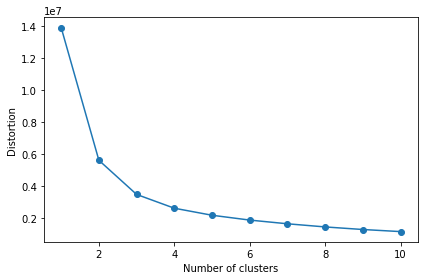

In [30]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(math_read_df)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

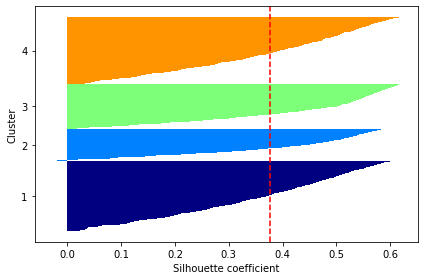

In [31]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=4, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(math_read_df)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(math_read_df, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

### KMeans Grid Search

In [46]:
#Define Parameter List
param_grid = {'n_clusters':[2,3,4],
             "n_init": [10,15,20] }

#Create KMeans Object
kmeans = KMeans(init='k-means++')

#Set Grid Search, the Grid Search uses Negative Inertia (Default Behavior in Sklearn's KMeans)
grid_search = GridSearchCV(kmeans, param_grid)

grid_search.fit(math_read_df)


GridSearchCV(estimator=KMeans(),
             param_grid={'n_clusters': [2, 3, 4], 'n_init': [10, 15, 20]})

In [47]:
# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Print the best score (which will be negative inertia)
print("Best Score: ", grid_search.best_score_)

print("Best inertia: ", grid_search.best_estimator_.inertia_)

Best parameters:  {'n_clusters': 4, 'n_init': 10}
Best Score:  -520010.9143067443
Best inertia:  2599208.4515941283


### K-Mean Consistentcy Cluster using the Best Params

In [48]:
kmeans = KMeans(
    init='k-means++',    # initialization
    n_clusters=4,    # number of clusters
    n_init=15)         # number of different times to run k-means

kmeans.fit(math_read_df)

KMeans(n_clusters=4, n_init=15)

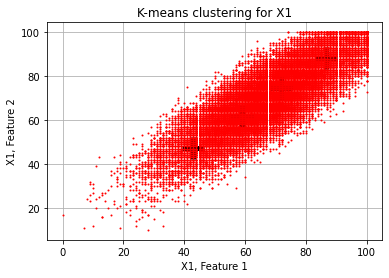

In [49]:
# visualize the data
unlabeled_np = math_read_df.values

# visualize the data
centroids = kmeans.cluster_centers_
plt.plot(unlabeled_np[:, 0], unlabeled_np[:, 1], 'r.', markersize=2) #plot the data
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=500, linewidths=5, color='k')  # plot the centroids
plt.title('K-means clustering for X1')
plt.xlabel('X1, Feature 1')
plt.ylabel('X1, Feature 2')
plt.grid()
plt.show()


### KMeans MiniBatch Grid Search

In [50]:
import warnings
warnings.filterwarnings('ignore')

#Define Parameter List
param_grid = {'n_clusters':[2,3,4],
             "batch_size": [10,15,20] }

#Create KMeans Minivatch Object
kmeans_mini = MiniBatchKMeans()

#Set Grid Search, the Grid Search uses Negative Inertia (Default Behavior in Sklearn's KMeans)
grid_search = GridSearchCV(kmeans_mini, param_grid,verbose=0)

grid_search.fit(math_read_df)


GridSearchCV(estimator=MiniBatchKMeans(),
             param_grid={'batch_size': [10, 15, 20], 'n_clusters': [2, 3, 4]})

In [51]:
# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Print the best score (which will be negative inertia)
print("Best Score: ", grid_search.best_score_)

print("Best inertia: ", grid_search.best_estimator_.inertia_)

Best parameters:  {'batch_size': 15, 'n_clusters': 4}
Best Score:  -525953.3388030421
Best inertia:  3175357.779103929


In [52]:
print("Kmeans Inertia is: 2600947.3919500113")
print("KMiniBatch is: 2617585.449277669")
print("Kmeans Inertia is the better of the two with a smaller SSE.")

Kmeans Inertia is: 2600947.3919500113
KMiniBatch is: 2617585.449277669
Kmeans Inertia is the better of the two with a smaller SSE.


### DBSCAN

In [ ]:
# lets first look at the connectivity of the graphs and distance to the nearest neighbors
from sklearn.neighbors import kneighbors_graph

N = 4

# create connectivity graphs before calcualting the hierarchy
X2_knn_graph = kneighbors_graph(math_read_df, N, mode='distance') # calculate distance to four nearest neighbors

N2 = X2_knn_graph.shape[0]
X2_4nn_distances = np.zeros((N2,1))
for i in range(N2):
    X2_4nn_distances[i] = X2_knn_graph[i,:].max()

X2_4nn_distances = np.sort(X2_4nn_distances, axis=0)


plt.figure(figsize=(15,5))
plt.plot(range(N2), X2_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('Dataset name: X2, sorted by neighbor distance')
plt.xlabel('Unlbaled Math and Reading, Instance Number')
plt.ylabel('Unlbaled Math and Reading, Distance to {0}th nearest neighbor'.format(4))

plt.show()

### Grid Search #1 for DBScan

In [43]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Assuming X is your data
X = math_read_df

# Define the parameter space
eps_values = [1.2, 1.3, 1.4, 1.5, 2]  # example values
min_samples_values = [2, 3, 4, 10, 15]  # example values

best_score = -1
best_eps = None
best_min_samples = None

# Iterate over all combinations of eps_values and min_samples_values
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        # Perform clustering
        labels = dbscan.fit_predict(X)
        
        # Ignore bad fits
        if len(set(labels)) > 1:  
            score = silhouette_score(X, labels)
            
            # Save parameters if better than previous best
            if score > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = score

print("Best eps =", best_eps)
print("Best min_samples =", best_min_samples)
print("Best score =", best_score)


Best eps = 2
Best min_samples = 10
Best score = 0.47376297565496267


### Grid Search #2 for DBScan

In [80]:
dbscan_param= {'eps': [1.2, 1.3, 1.4, 1.5, 2],
                    'min_samples': [2, 3, 4, 10, 15],}

def custom_silhouette_score(estimator, math_read_df):
    labels = estimator.fit_predict(math_read_df)
    return silhouette_score(math_read_df, labels)

#Create DBSCAN Object
ca = DBSCAN()

#Set Grid Search, the Grid Search uses Negative Inertia (Default Behavior in Sklearn's KMeans)
grid_search = GridSearchCV(ca, dbscan_param, scoring=custom_silhouette_score,verbose=0)

grid_search.fit(math_read_df)

print("Best parameters X3:", grid_search.best_params_)

Best parameters X3: {'eps': 2, 'min_samples': 15}


In [81]:
print("Best Score: ", -grid_search.best_score_)


Best Score:  -0.26716298479369516


## Visualize DBSCAN

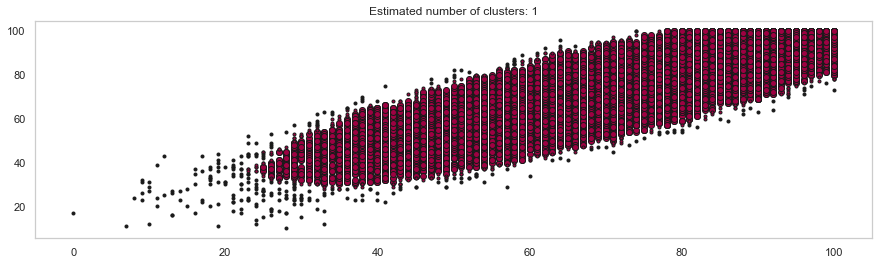

In [87]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Perform DBSCAN on the data
db = DBSCAN(eps=2, min_samples=15).fit(math_read_df)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# mark the samples that are considered "core"
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Define the figure size
plt.figure(figsize=(15,4))

# Get the unique labels and colors for each label
unique_labels = set(labels) # the unique labels
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

data = math_read_df.values  # Get a numpy array version of your DataFrame

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    # plot the core points in this class
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)

    # plot the remaining points that are edge points
    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.grid()
plt.show()


## Guassian Mixture

### GridSearch

In [92]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

# Assuming X is your data
X = math_read_df

# Custom scorer for BIC
def bic_scorer(estimator, X):
    return -estimator.bic(X)  # Returns negative BIC because GridSearchCV maximizes the score

# Define the parameter space
param_grid = {'n_components': range(1, 5), 'covariance_type': ['full', 'tied', 'diag', 'spherical']}

# Create a GaussianMixture object
gmm = GaussianMixture()

# Create the grid search object
grid_search = GridSearchCV(gmm, param_grid, scoring=bic_scorer, cv=KFold(5))

# Perform the grid search
grid_search.fit(X)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Print the best score (which will be the negative of BIC, because GridSearchCV always tries to maximize the score)
print("Best score (negative BIC): ", grid_search.best_score_)

# Convert the score back to positive, because lower BIC is better
print("Best BIC: ", -grid_search.best_score_)


Best parameters:  {'covariance_type': 'tied', 'n_components': 2}
Best score (negative BIC):  -94526.04564299877
Best BIC:  94526.04564299877


In [93]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

# Assuming X is your data
X = math_read_df

# Custom scorer for AIC
def aic_scorer(estimator, X):
    return -estimator.aic(X)

# Define the parameter space
param_grid = {'n_components': range(1, 5), 'covariance_type': ['full', 'tied', 'diag', 'spherical']}

# Create a GaussianMixture object
gmm = GaussianMixture()

# Create the grid search object
grid_search = GridSearchCV(gmm, param_grid, scoring=aic_scorer, cv=KFold(5))

# Perform the grid search
grid_search.fit(X)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Print the best score (which will be the negative of AIC, because GridSearchCV always tries to maximize the score)
print("Best score (negative AIC): ", grid_search.best_score_)

# Convert the score back to positive, because lower AIC is better
print("Best AIC: ", -grid_search.best_score_)


Best parameters:  {'covariance_type': 'full', 'n_components': 3}
Best score (negative AIC):  -94439.55650256334
Best AIC:  94439.55650256334


## Visualize Final Results for GMM

In [96]:
# create an instance of the GaussianMixture class; set number of clusters to 2
gmm = GaussianMixture(n_components=2, covariance_type="tied")

# fit the gmm model
gmm.fit(X)

# get the cluster labels
labels = gmm.predict(X)
labels


array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [98]:
print('means:', gmm.means_)
print('\n')
print('variances:', gmm.covariances_)
print('\n')
print('weights:', gmm.weights_)
print('\n')
print('first five posterior_prob:\n', gmm.predict_proba(X)[:5].round(3))

means: [[56.00851416 59.07103918]
 [75.68922837 78.29770462]]


variances: [[139.64234008  91.3054965 ]
 [ 91.3054965  125.8838534 ]]


weights: [0.46394791 0.53605209]


first five posterior_prob:
 [[0.317 0.683]
 [0.08  0.92 ]
 [0.016 0.984]
 [0.937 0.063]
 [0.138 0.862]]


## Compare All Models

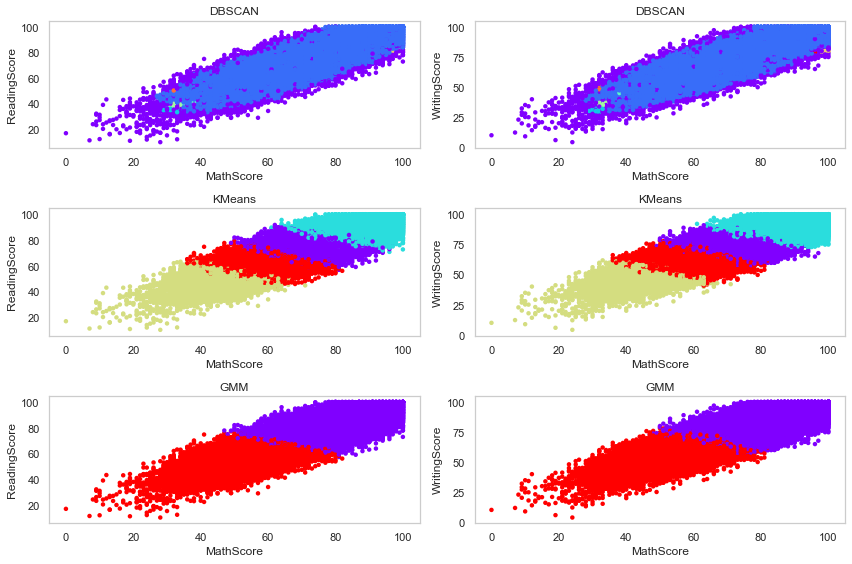

In [105]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

data = num_df

cls = DBSCAN(eps=2, min_samples=10)
cls.fit(data)
dbs_labels = cls.labels_ 

cls = KMeans(init="k-means++",n_clusters=4,n_init=15,random_state=1)
cls.fit(data)
kmn_labels = cls.labels_

cls = GaussianMixture(n_components=2, covariance_type="tied")
cls.fit(data)
gmm_labels = cls.predict(data)  # Correct way to get labels for GaussianMixture

fig = plt.figure(figsize=(12,8))
title = ['DBSCAN','KMeans','GMM']

# assuming 'Feature1' and 'Feature2' are names of your columns
for i,l in enumerate([dbs_labels, kmn_labels, gmm_labels]):
    
    plt.subplot(3,2,2*i+1)
    plt.scatter(data['MathScore'], data['ReadingScore']+np.random.random(data['ReadingScore'].shape)/2, c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('MathScore'), plt.ylabel('ReadingScore')
    plt.grid()
    plt.title(title[i])
    
    plt.subplot(3,2,2*i+2)
    plt.scatter(data['MathScore'], data['WritingScore']+np.random.random(data['WritingScore'].shape)/2, c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('MathScore'), plt.ylabel('WritingScore')
    plt.grid()
    plt.title(title[i])
    
plt.tight_layout()
plt.show()


# Exceptional Work

## Silhouette Score
- The Silhouette score measures how well-separated the clusters are. It quantifies both the cohesion (simiarity between points in the cluster) and the separation (how distinct the clusters are from each other). 
- Scores range from -1 to +1, where the higher values indicate better-defined clusters.

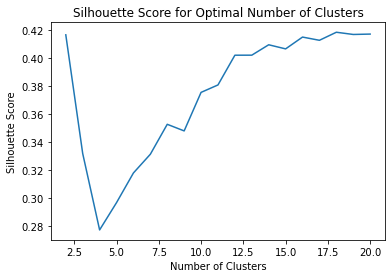

In [6]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for num_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=num_clusters,n_init=10, random_state=42)
    cluster_assignments = kmeans.fit_predict(scaled_explanatory_variables)
    silhouette_scores.append(silhouette_score(scaled_explanatory_variables, cluster_assignments))

# Plot the silhouette scores
plt.plot(range(2, 21), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

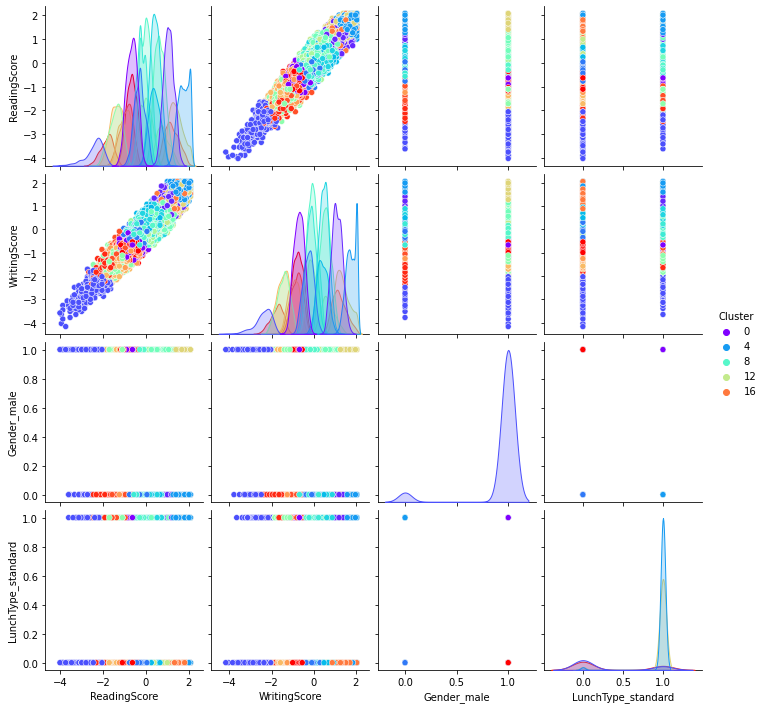

In [7]:
import seaborn as sns

# Add the cluster assignments to the DataFrame
scaled_explanatory_variables['Cluster'] = cluster_assignments

# Create pair plots with hue set to the cluster assignments
sns.pairplot(scaled_explanatory_variables, hue='Cluster', palette='rainbow')
plt.show()

<hr>

# Cluster Analysis - KMeans

In [10]:
# Specify the number of clusters you want to identify
num_clusters = 2

# Initialize the KMeans clustering algorithm
kmeans = KMeans(n_clusters=num_clusters,
                n_init=10,
                random_state=42)

# Fit the algorithm to the scaled explanatory variables and obtain the cluster assignments
cluster_assignments = kmeans.fit_predict(scaled_explanatory_variables)

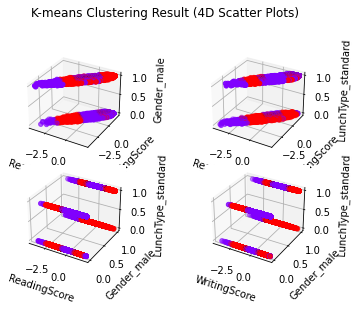

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

# Create subplots for 3D scatter plots
ax1 = fig.add_subplot(221, projection='3d')  # ReadingScore, WritingScore, Gender_male
ax2 = fig.add_subplot(222, projection='3d')  # ReadingScore, WritingScore, LunchType_standard
ax3 = fig.add_subplot(223, projection='3d')  # ReadingScore, Gender_male, LunchType_standard
ax4 = fig.add_subplot(224, projection='3d')  # WritingScore, Gender_male, LunchType_standard

# Plot the data points in 3D with colors representing cluster assignments
ax1.scatter(scaled_explanatory_variables['ReadingScore'],
            scaled_explanatory_variables['WritingScore'],
            scaled_explanatory_variables['Gender_male'],
            c=cluster_assignments, cmap='rainbow')
ax1.set_xlabel('ReadingScore')
ax1.set_ylabel('WritingScore')
ax1.set_zlabel('Gender_male')

ax2.scatter(scaled_explanatory_variables['ReadingScore'],
            scaled_explanatory_variables['WritingScore'],
            scaled_explanatory_variables['LunchType_standard'],
            c=cluster_assignments, cmap='rainbow')
ax2.set_xlabel('ReadingScore')
ax2.set_ylabel('WritingScore')
ax2.set_zlabel('LunchType_standard')

ax3.scatter(scaled_explanatory_variables['ReadingScore'],
            scaled_explanatory_variables['Gender_male'],
            scaled_explanatory_variables['LunchType_standard'],
            c=cluster_assignments, cmap='rainbow')
ax3.set_xlabel('ReadingScore')
ax3.set_ylabel('Gender_male')
ax3.set_zlabel('LunchType_standard')

ax4.scatter(scaled_explanatory_variables['WritingScore'],
            scaled_explanatory_variables['Gender_male'],
            scaled_explanatory_variables['LunchType_standard'],
            c=cluster_assignments, cmap='rainbow')
ax4.set_xlabel('WritingScore')
ax4.set_ylabel('Gender_male')
ax4.set_zlabel('LunchType_standard')

plt.suptitle('K-means Clustering Result (4D Scatter Plots)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [12]:
# Extract the 'MathResult' column from the original data
ground_truth_labels = data['MathResult']

# Convert the categorical labels to numerical format
ground_truth_labels = ground_truth_labels.map({'Fail': 0, 'Pass': 1})

In [13]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score

davies_bouldin_index_model = davies_bouldin_score(scaled_explanatory_variables, cluster_assignments)
silhouette_score_kmeans = silhouette_score(scaled_explanatory_variables, cluster_assignments)

ari_kmeans = adjusted_rand_score(ground_truth_labels, cluster_assignments)

print('Davies Bouldin Index (K-Means):', davies_bouldin_index_model)
print("Silhouette Score (K-Means):", silhouette_score_kmeans)
print("Adjusted Rand Index (K-Means):", ari_kmeans)

Davies Bouldin Index (K-Means): 0.6458318711686986
Silhouette Score (K-Means): 0.5542065325389777
Adjusted Rand Index (K-Means): 0.01862270668064781


<hr>

# Cluster Analysis - DBSCAN

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize the DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the algorithm to the scaled explanatory variables and obtain the cluster assignments
cluster_assignments = dbscan.fit_predict(scaled_explanatory_variables)

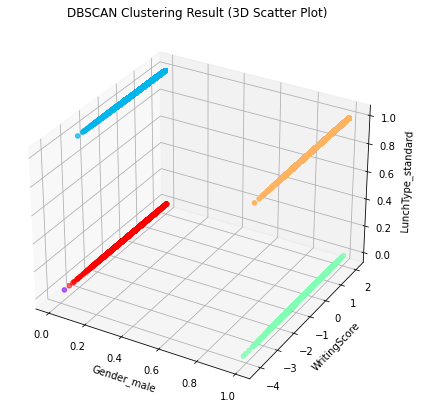

In [34]:
# Visualize the DBSCAN clustering results in a 3D scatter plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_explanatory_variables['Gender_male'],
           scaled_explanatory_variables['WritingScore'],
           scaled_explanatory_variables['LunchType_standard'],
           c=cluster_assignments, cmap='rainbow')

ax.set_xlabel('Gender_male')
ax.set_ylabel('WritingScore')
ax.set_zlabel('LunchType_standard')
ax.set_title('DBSCAN Clustering Result (3D Scatter Plot)')
plt.show()

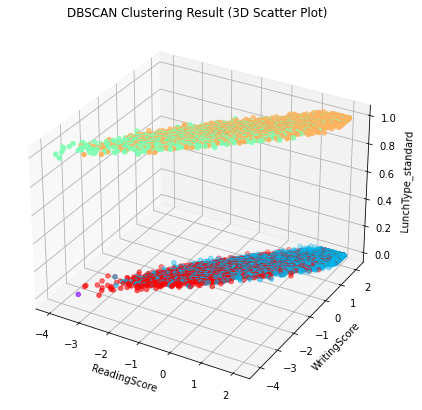

In [35]:
# Visualize the DBSCAN clustering results in a 3D scatter plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_explanatory_variables['ReadingScore'],
           scaled_explanatory_variables['WritingScore'],
           scaled_explanatory_variables['Gender_male'],
           c=cluster_assignments, cmap='rainbow')

ax.set_xlabel('ReadingScore')
ax.set_ylabel('WritingScore')
ax.set_zlabel('LunchType_standard')
ax.set_title('DBSCAN Clustering Result (3D Scatter Plot)')
plt.show()

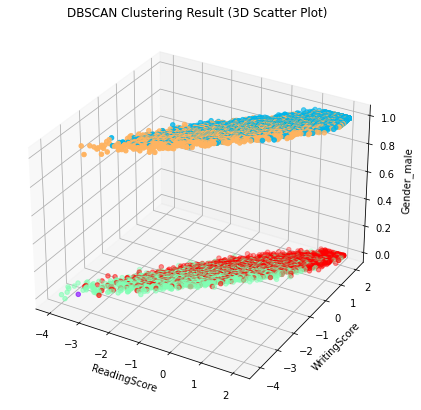

In [36]:
# Visualize the DBSCAN clustering results in a 3D scatter plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_explanatory_variables['ReadingScore'],
           scaled_explanatory_variables['WritingScore'],
           scaled_explanatory_variables['LunchType_standard'],
           c=cluster_assignments, cmap='rainbow')

ax.set_xlabel('ReadingScore')
ax.set_ylabel('WritingScore')
ax.set_zlabel('Gender_male')
ax.set_title('DBSCAN Clustering Result (3D Scatter Plot)')
plt.show()

In [37]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score

davies_bouldin_index_model = davies_bouldin_score(scaled_explanatory_variables, cluster_assignments)
silhouette_score_kmeans = silhouette_score(scaled_explanatory_variables, cluster_assignments)

ari_kmeans = adjusted_rand_score(ground_truth_labels, cluster_assignments)

print('Davies Bouldin Index (DBSCAN):', davies_bouldin_index_model)
print("Silhouette Score (DBSCAN):", silhouette_score_kmeans)
print("Adjusted Rand Index (DBSCAN):", ari_kmeans)

Davies Bouldin Index (DBSCAN): 1.4409955838939505
Silhouette Score (DBSCAN): 0.172961855871309
Adjusted Rand Index (DBSCAN): 0.035639733140200816


# Cluster Analysis - Agglomerative Clustering

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Specify the number of clusters you want to identify
num_clusters = 2

# Initialize the AgglomerativeClustering algorithm
agglomerative = AgglomerativeClustering(n_clusters=num_clusters)

# Fit the algorithm to the scaled explanatory variables and obtain the cluster assignments
cluster_assignments = agglomerative.fit_predict(scaled_explanatory_variables)

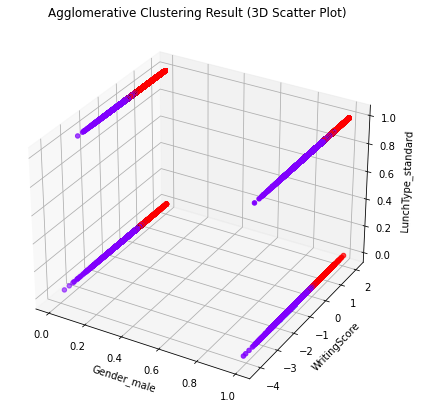

In [39]:
# Visualize the Agglomerative Clustering results in a 3D scatter plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_explanatory_variables['Gender_male'],
           scaled_explanatory_variables['WritingScore'],
           scaled_explanatory_variables['LunchType_standard'],
           c=cluster_assignments, cmap='rainbow')

ax.set_xlabel('Gender_male')
ax.set_ylabel('WritingScore')
ax.set_zlabel('LunchType_standard')
ax.set_title('Agglomerative Clustering Result (3D Scatter Plot)')
plt.show()

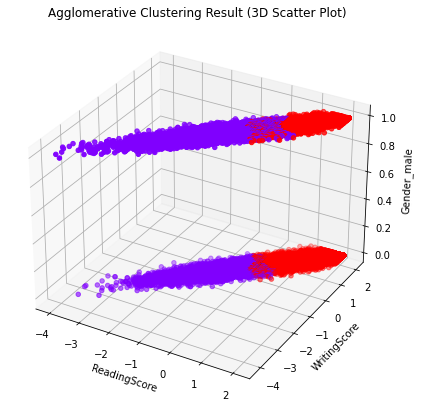

In [40]:
# Visualize the Agglomerative Clustering results in a 3D scatter plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_explanatory_variables['ReadingScore'],
           scaled_explanatory_variables['WritingScore'],
           scaled_explanatory_variables['Gender_male'],
           c=cluster_assignments, cmap='rainbow')

ax.set_xlabel('ReadingScore')
ax.set_ylabel('WritingScore')
ax.set_zlabel('Gender_male')
ax.set_title('Agglomerative Clustering Result (3D Scatter Plot)')
plt.show()

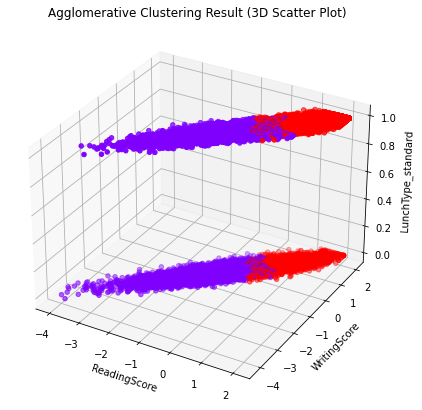

In [41]:
# Visualize the Agglomerative Clustering results in a 3D scatter plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_explanatory_variables['ReadingScore'],
           scaled_explanatory_variables['WritingScore'],
           scaled_explanatory_variables['LunchType_standard'],
           c=cluster_assignments, cmap='rainbow')

ax.set_xlabel('ReadingScore')
ax.set_ylabel('WritingScore')
ax.set_zlabel('LunchType_standard')
ax.set_title('Agglomerative Clustering Result (3D Scatter Plot)')
plt.show()

In [42]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score

davies_bouldin_index_model = davies_bouldin_score(scaled_explanatory_variables, cluster_assignments)
silhouette_score_kmeans = silhouette_score(scaled_explanatory_variables, cluster_assignments)

ari_kmeans = adjusted_rand_score(ground_truth_labels, cluster_assignments)

print('Davies Bouldin Index (Agglomerative):', davies_bouldin_index_model)
print("Silhouette Score (Agglomerative):", silhouette_score_kmeans)
print("Adjusted Rand Index (Agglomerative):", ari_kmeans)

Davies Bouldin Index (Agglomerative): 0.9383041442988599
Silhouette Score (Agglomerative): 0.37066452462311167
Adjusted Rand Index (Agglomerative): 0.2660475093431273


# Results